# 4. Evaluate a model

Three ways to evaluate scikit-learn model
1. Estimator `score` method
2. The `scoring` parameter
3. **Problem-specific metric funtions of scikit-learn.**

## 4.1 Evaluating a model with the `score` method

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Classification model**

In [3]:
#importing data
heart_df = pd.read_csv('./data/heart-disease.csv')

# creating X, y
X = heart_df.drop('target', axis=1)
y = heart_df['target']

#setup random seed
np.random.seed(42)

# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 

from sklearn.ensemble import RandomForestClassifier

# model initiation
rfc = RandomForestClassifier(n_estimators=50)

# fit the model to the data (training machine learning model)
rfc.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [4]:
# evaluate the random forest (use model to test on test data to get score)
rfc.score(X_test, y_test)

0.8852459016393442

**Regression**

In [6]:
# import boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()

boston_df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
boston_df['target'] = pd.Series(boston['target'])

from sklearn.ensemble import RandomForestRegressor

#setup random seed
np.random.seed(42)

# create X and y
X = boston_df.drop('target', axis=1)
y = boston_df['target']

# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 

#fit the model
model = RandomForestRegressor(n_estimators=81)
model.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=81, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [7]:
# check score
model.score(X_test, y_test)

0.8732460715697482

## 4.2 Evaluationg a model using `scoring` parameter

In [18]:
from sklearn.model_selection import cross_val_score
# creating X, y
X = heart_df.drop('target', axis=1)
y = heart_df['target']

# #setup random seed
# np.random.seed(42)

# # train test split
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 

from sklearn.ensemble import RandomForestClassifier

# # model initiation
rfc = RandomForestClassifier(n_estimators=50)

# # fit the model to the data (training machine learning model)
# rfc.fit(X_train, y_train);


In [26]:
# for cross validation we just need model, X, y and other parameter
cross_val_score(rfc, X, y, cv=3).mean()

0.8283828382838284

In [28]:
sumc = 0
for i in range(2,21):
    print(f"{i} = {cross_val_score(rfc, X, y, cv=i).mean()}")
    sumc = sumc + cross_val_score(rfc, X, y, cv=i).mean()
print(f"Mean score from 20 mean score is {sumc/19}")

2 = 0.8381840362495643
3 = 0.8151815181518152
4 = 0.8249561403508772
5 = 0.8118579234972678
6 = 0.8411111111111111
7 = 0.8184083358501962
8 = 0.8084103840682788
9 = 0.8081798375916023
10 = 0.8379569892473118
11 = 0.8110870610870612
12 = 0.8515384615384617
13 = 0.8212095875139354
14 = 0.8242115027829312
15 = 0.8346031746031746
16 = 0.8280336257309941
17 = 0.831026528258362
18 = 0.8210784313725489
19 = 0.831359649122807
20 = 0.828125
Mean score from 20 mean score is 0.8204701881758215


**Using scoring parameter**

In [32]:
# default scoring parameter of classifier = mean accuracy
cross_val_score(rfc, X, y, cv=3, scoring=None)

array([0.82178218, 0.84158416, 0.8019802 ])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

#### 1. Accuracy

In [35]:
from sklearn.model_selection import cross_val_score
# creating X, y
X = heart_df.drop('target', axis=1)
y = heart_df['target']

# #setup random seed
np.random.seed(42)

# # train test split
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 

from sklearn.ensemble import RandomForestClassifier

# # model initiation
rfc = RandomForestClassifier(n_estimators=50)

# # fit the model to the data (training machine learning model)
# rfc.fit(X_train, y_train);

# default accuracy parameter
cross_val_score = cross_val_score(rfc, X, y, cv=5, scoring=None)

In [37]:
np.mean(cross_val_score)

0.8182513661202186

In [40]:
print(f"Heart disease classifier cross-validated accuracy: {np.mean(cross_val_score) * 100:.2f}%")

Heart disease classifier cross-validated accuracy: 81.83%


#### 2. Area under the Receiver Operating Characteristic Curve (ROC/AUC)

* Area Under Curve (AUC)
* ROC Curve

ROC curve are a comparison of a model's true positive rate (tpr) versus false positive rate(fpr)

* True positive = model predicts 1 when actual output 1
* False positive = model predicts 1 when actual output 0
* True negative = model predicts 0 when actual output 0
* False negative = model predicts 0 when actual output 1

In [62]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 
from sklearn.ensemble import RandomForestClassifier

# # model initiation
rfc = RandomForestClassifier(n_estimators=50)

# fit the model to the data (training machine learning model)
rfc.fit(X_train, y_train);

In [63]:
y_probs = rfc.predict_proba(X_test)

In [64]:
y_probs[:5]

array([[0.9 , 0.1 ],
       [0.34, 0.66],
       [0.58, 0.42],
       [0.24, 0.76],
       [0.1 , 0.9 ]])

In [65]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:5]

array([0.1 , 0.66, 0.42, 0.76, 0.9 ])

In [66]:
y_probs = rfc.predict_proba(X_test)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

In [67]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03703704, 0.11111111, 0.14814815, 0.14814815, 0.14814815,
       0.18518519, 0.18518519, 0.25925926, 0.25925926, 0.25925926,
       0.40740741, 0.44444444, 0.48148148, 0.51851852, 0.51851852,
       0.59259259, 0.59259259, 0.62962963, 0.77777778, 0.88888889,
       1.        ])

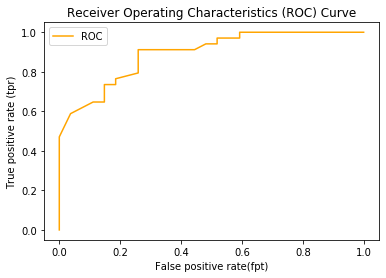

In [68]:
# create a function for ploting ROC curve
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model
    """
    # plot roc curve
    plt.plot(fpr, tpr, color="orange", label='ROC')
    # plot line with no predictive power (baseline)
    #plt.plot([0,1],[0,1], color='darkblue', linestyle="--", label="Guessing")
    
    # customixze the plot
    plt.xlabel("False positive rate(fpt)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristics (ROC) Curve")
    plt.legend()
    plt.show()
plot_roc_curve(fpr, tpr)

In [69]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

0.8916122004357299

In [70]:
# plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)

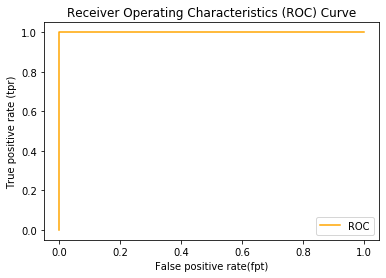

In [71]:
plot_roc_curve(fpr, tpr)

In [72]:
# perfect AUC score
roc_auc_score(y_test, y_test)

1.0

#### 3. Confusion matrix

A confusion matrix is a quick way to copare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused

In [73]:
from sklearn.metrics import confusion_matrix

y_preds = rfc.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[20,  7],
       [ 7, 27]], dtype=int64)

In [74]:
# visualize confusion matix using pd.crosstab
pd.crosstab(y_test, 
            y_preds,
            rownames=["Actual Labels"],
            colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Labels,,
0,20,7
1,7,27


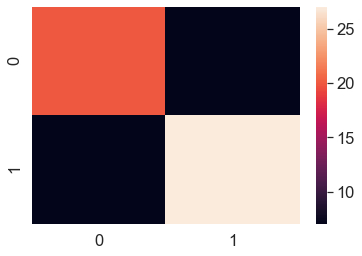

In [76]:
# make confusio matix visual using seaborn heatmap()
import seaborn as sns
# set the font scale
sns.set(font_scale=1.5)

#create confusion metrics
conf_mat = confusion_matrix(y_test, y_preds)

# plot it using seaborn
sns.heatmap(conf_mat);

**Ploting confusion matrix (from model predict to calculation)**

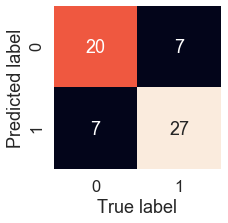

In [79]:
from sklearn.metrics import confusion_matrix
y_preds = rfc.predict(X_test)
conf_mat = confusion_matrix(y_test, y_preds)
def plot_conf_mat(conf_mat):
    import seaborn as sns
    """
    Ploting a confusion matrix using seaborn's headmap
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                     annot=True, #annotate the box with conf_mat info
                     cbar=False)
    plt.xlabel('True label')
    plt.ylabel('Predicted label')
plot_conf_mat(conf_mat) 

#### 4. Classification Report

In [82]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74        27
           1       0.79      0.79      0.79        34

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



**To summarize classification metrics:**
* **Accuracy** is a good measure to start with if all classes are balanced 
* **Precision and Recall** become more important when classes are imballanced. 
* If false positive preditions are worse than false negatives, aim for higher precision.
* If false negative negative predictions are worse than false positives, aim for higher recall.
* **F1-score** is a combination of precision and recall.

### 4.2.2 Regression model evaluation metrics

1. R^2 (r-squared) or coefficient of determination
2. Mean Absolute Error (MAE)
3. Mean Squared Error (MSE)

**R^2**

What R-squared does: Compare your models predictions to the mean of the targets. Values can range from negative infinity(a very poor model) to 1. For example, if all your model does is predict the mean of the targets, it's R^2 value would be zero. And if your model perfectly predicts a range of numbers it's R^2 value would be 1 

In [92]:
# import boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()

boston_df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
boston_df['target'] = pd.Series(boston['target'])

from sklearn.ensemble import RandomForestRegressor

#setup random seed
np.random.seed(42)

# create X and y
X = boston_df.drop('target', axis=1)
y = boston_df['target']

# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 

#fit the model
model = RandomForestRegressor(n_estimators=81)
model.fit(X_train, y_train)
# default it is using r-squared
model.score(X_test, y_test)

0.8732460715697482

**1. R^2 Score**

In [94]:
y_preds = model.predict(X_test)

In [88]:
# checking r^2 score as the definition of r^2
from sklearn.metrics import r2_score
# fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

r2_score(y_test, y_test_mean)

2.220446049250313e-16

In [90]:
r2_score(y_test, y_test)

1.0

In [95]:
# same as score done by default
r2_score(y_test, y_preds)

0.8732460715697482

**2. Mean Absolute Error (MAE)**

In [97]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_preds)
mae

2.1388283708545157

In [101]:
# checking side by side
df = pd.DataFrame(data = { "Actual values": y_test,
                           "Predicted values": y_preds})
df['Difference(error)'] = abs(df['Actual values'] - df['Predicted values'])

In [100]:
df

,Actual values,Predicted values,Difference(error)
173,23.6,22.856790,0.743210
274,32.4,31.182716,1.217284
491,13.6,16.872840,3.272840
72,22.8,23.412346,0.612346
452,16.1,17.004938,0.904938
...,...,...,...
412,17.9,12.804938,5.095062
436,9.6,12.592593,2.992593
411,17.2,13.058025,4.141975
86,22.5,20.117284,2.382716


**3. Mean Squared Error (MSE)**

In [102]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_preds)

In [104]:
mse

9.29534510222318

* Pay more attention to MAE: When being 10,000 off is twice as bad as being 5,000 off. (if change affect linearly) 
* Pay more attention to MSE: When being 10,000 off is more than twice as bad as being 5,000 off. (if change affect exponentially)

### 4.2.3 Finally using `scoring` parameter

**Classification model**

In [105]:
from sklearn.model_selection import cross_val_score

# creating X, y
X = heart_df.drop('target', axis=1)
y = heart_df['target']

# #setup random seed
np.random.seed(42)

from sklearn.ensemble import RandomForestClassifier

# # model initiation
clf = RandomForestClassifier(n_estimators=50)

`scoring= "parameter"`

In [111]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X,y, cv=5, scoring=None)
cv_acc.mean()

0.8182513661202186

In [112]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X,y, cv=5, scoring="accuracy")
cv_acc.mean()

0.8182513661202186

In [114]:
# Precision
np.random.seed(42)
cv_precision = cross_val_score(clf, X,y, cv=5, scoring="precision")
cv_precision.mean()

0.8225761738261739

In [115]:
# Recall
np.random.seed(42)
cv_recall = cross_val_score(clf, X,y, cv=5, scoring="recall")
cv_recall.mean()

0.8545454545454545

In [116]:
# F-1 score
np.random.seed(42)
cv_f1 = cross_val_score(clf, X,y, cv=5, scoring="f1")
cv_f1.mean()

0.8372471319530144

**Regression Model**

In [117]:
# import boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()

boston_df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
boston_df['target'] = pd.Series(boston['target'])

from sklearn.ensemble import RandomForestRegressor

#setup random seed
np.random.seed(42)

# create X and y
X = boston_df.drop('target', axis=1)
y = boston_df['target']

model = RandomForestRegressor(n_estimators=81)

In [118]:
np.random.seed(42)
cv_acc = cross_val_score(model, X,y, cv=5, scoring=None)
cv_acc.mean()

0.6207118928771969

In [120]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X,y, cv=5, scoring='r2')
cv_r2.mean()

0.6207118928771969

In [123]:
np.random.seed(42)
cv_mae = cross_val_score(model, X,y, cv=5, scoring='neg_mean_absolute_error')
cv_mae.mean()

-3.0093324561214287

In [124]:
np.random.seed(42)
cv_mse = cross_val_score(model, X,y, cv=5, scoring='neg_mean_squared_error')
cv_mse.mean()

-21.275437766082206

## 4.3 Problem-specific metric funtions of scikit-learn.

#### 4.3.1 Classification

In [126]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#importing data
heart_df = pd.read_csv('./data/heart-disease.csv')

# creating X, y
X = heart_df.drop('target', axis=1)
y = heart_df['target']

#setup random seed
np.random.seed(42)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 

# model initiation
clf = RandomForestClassifier(n_estimators=50)

# fit the model to the data (training machine learning model)
clf.fit(X_train, y_train)

# make some prediction
y_preds = clf.predict(X_test)

# evaluate the classifier
print("Classifier matrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:0.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1-score: {f1_score(y_test, y_preds)}")

Classifier matrics on the test set
Accuracy: 88.52%
Precision: 0.8787878787878788
Recall: 0.90625
F1-score: 0.8923076923076922


#### 4.3.1 Regression

In [129]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# import boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()

boston_df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
boston_df['target'] = pd.Series(boston['target'])

#setup random seed
np.random.seed(42)

# create X and y
X = boston_df.drop('target', axis=1)
y = boston_df['target']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 

#fit the model
model = RandomForestRegressor(n_estimators=81)
model.fit(X_train, y_train)

# make some prediction
y_preds = model.predict(X_test)

# evaluate the classifier using r2_score, mean_absolute_error, mean_squared_error
print("Regression matrics on the test set")
print(f"Accuracy(R^2 score): {r2_score(y_test, y_preds)*100:0.2f}%")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")

Regression matrics on the test set
Accuracy(R^2 score): 87.32%
MAE: 2.1388283708545157
MSE: 9.29534510222318
